<a href="https://colab.research.google.com/github/Ajay-Sai-Kiran/Natural-Language-Processing/blob/main/Day_7_PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

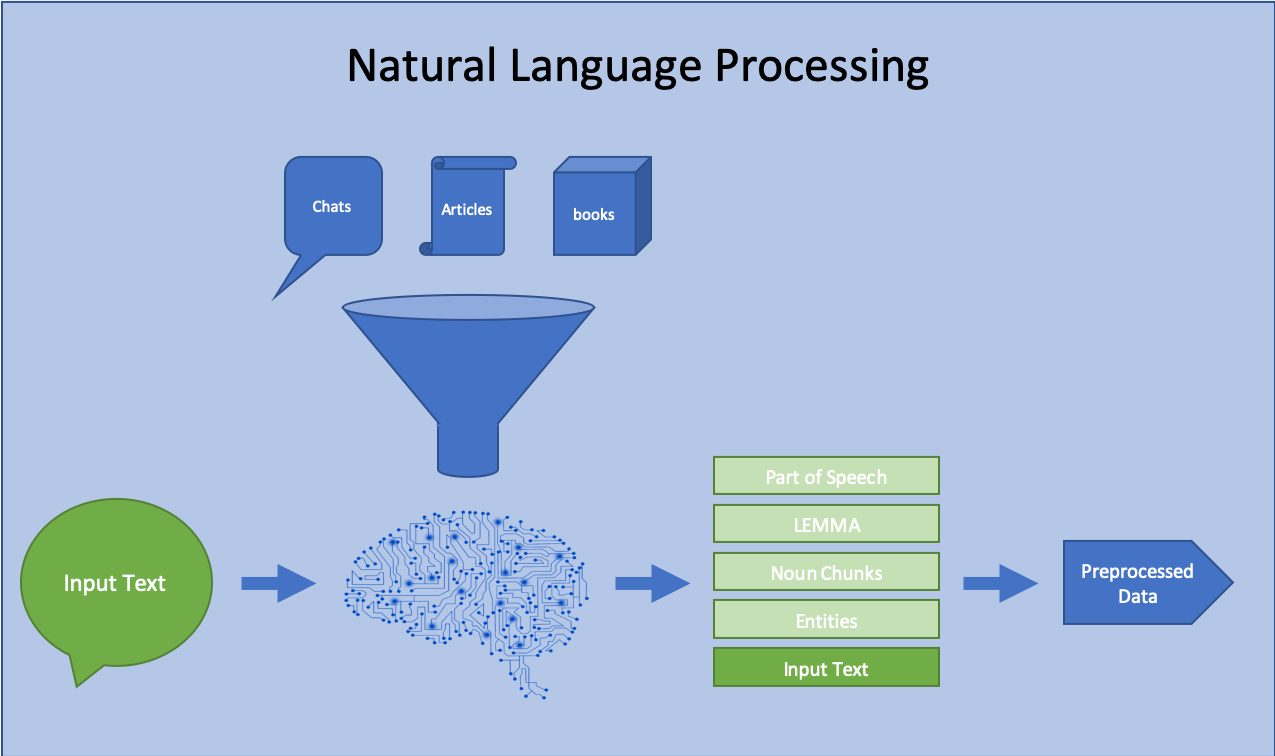

#Contents

#Preprocessing

Removing punctuations like . , ! $( ) * % @

Removing URLs

Removing Stop words

Lower casing

Tokenization

Stemming

Lemmatization

#Removing punctuations like . , ! $( ) * % @

In [2]:
import pandas as pd
#reading the data
data = pd.read_csv("/content/spam.csv",encoding="ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
#expanding the dispay of text sms column
pd.set_option('display.max_colwidth', -1)
#using only v1 and v2 column
data= data [['v1','v2']]
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [4]:
#checking the count of the dependent variable
data['v1'].value_counts()

ham     4825
spam    747 
Name: v1, dtype: int64

In [5]:
#library that contains punctuation
import string
string.punctuation
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
data['clean_msg']= data['v2'].apply(lambda x:remove_punctuation(x))
data.head()

,v1,v2,clean_msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though


#Lowering the text: 

In [7]:
data['msg_lower']= data['clean_msg'].apply(lambda x: x.lower())
data.head()

,v1,v2,clean_msg,msg_lower
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,nah i dont think he goes to usf he lives around here though


#Tokenization: 

In [9]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
data['msg_tokenied']= data['msg_lower'].apply(lambda x: tokenization(x))
data

,v1,v2,clean_msg,msg_lower,msg_tokenied
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,[go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat]
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni,[ok lar joking wif u oni]
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,[free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s]
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say,[u dun say so early hor u c already then say]
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,nah i dont think he goes to usf he lives around here though,[nah i dont think he goes to usf he lives around here though]
...,...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",This is the 2nd time we have tried 2 contact u U have won the å£750 Pound prize 2 claim is easy call 087187272008 NOW1 Only 10p per minute BTnationalrate,this is the 2nd time we have tried 2 contact u u have won the å£750 pound prize 2 claim is easy call 087187272008 now1 only 10p per minute btnationalrate,[this is the 2nd time we have tried 2 contact u u have won the å£750 pound prize 2 claim is easy call 087187272008 now1 only 10p per minute btnationalrate]
5568,ham,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,will ì b going to esplanade fr home,[will ì b going to esplanade fr home]
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",Pity was in mood for that Soany other suggestions,pity was in mood for that soany other suggestions,[pity was in mood for that soany other suggestions]
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,The guy did some bitching but I acted like id be interested in buying something else next week and he gave it to us for free,the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free,[the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free]


#Stop word removal: 

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
#importing nlp library
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [13]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [15]:
#applying the function
data['no_stopwords']= data['msg_tokenied'].apply(lambda x:remove_stopwords(x))
data

,v1,v2,clean_msg,msg_lower,msg_tokenied,no_stopwords
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,[go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat],[go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat]
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni,[ok lar joking wif u oni],[ok lar joking wif u oni]
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,[free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s],[free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s]
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say,[u dun say so early hor u c already then say],[u dun say so early hor u c already then say]
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,nah i dont think he goes to usf he lives around here though,[nah i dont think he goes to usf he lives around here though],[nah i dont think he goes to usf he lives around here though]
...,...,...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",This is the 2nd time we have tried 2 contact u U have won the å£750 Pound prize 2 claim is easy call 087187272008 NOW1 Only 10p per minute BTnationalrate,this is the 2nd time we have tried 2 contact u u have won the å£750 pound prize 2 claim is easy call 087187272008 now1 only 10p per minute btnationalrate,[this is the 2nd time we have tried 2 contact u u have won the å£750 pound prize 2 claim is easy call 087187272008 now1 only 10p per minute btnationalrate],[this is the 2nd time we have tried 2 contact u u have won the å£750 pound prize 2 claim is easy call 087187272008 now1 only 10p per minute btnationalrate]
5568,ham,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,will ì b going to esplanade fr home,[will ì b going to esplanade fr home],[will ì b going to esplanade fr home]
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",Pity was in mood for that Soany other suggestions,pity was in mood for that soany other suggestions,[pity was in mood for that soany other suggestions],[pity was in mood for that soany other suggestions]
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,The guy did some bitching but I acted like id be interested in buying something else next week and he gave it to us for free,the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free,[the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free],[the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free]


#Stemming: 

In [18]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()


In [22]:
#defining a function for stemming
def stemming(text):
  stem_text = [porter_stemmer.stem(word) for word in text]
  return stem_text
data['msg_stemmed']=data['no_stopwords'].apply(lambda x: stemming(x))

In [23]:
data

,v1,v2,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,[go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat],[go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat],[go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat]
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni,[ok lar joking wif u oni],[ok lar joking wif u oni],[ok lar joking wif u oni]
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,[free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s],[free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s],[free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18]
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say,[u dun say so early hor u c already then say],[u dun say so early hor u c already then say],[u dun say so early hor u c already then say]
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,nah i dont think he goes to usf he lives around here though,[nah i dont think he goes to usf he lives around here though],[nah i dont think he goes to usf he lives around here though],[nah i dont think he goes to usf he lives around here though]
...,...,...,...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",This is the 2nd time we have tried 2 contact u U have won the å£750 Pound prize 2 claim is easy call 087187272008 NOW1 Only 10p per minute BTnationalrate,this is the 2nd time we have tried 2 contact u u have won the å£750 pound prize 2 claim is easy call 087187272008 now1 only 10p per minute btnationalrate,[this is the 2nd time we have tried 2 contact u u have won the å£750 pound prize 2 claim is easy call 087187272008 now1 only 10p per minute btnationalrate],[this is the 2nd time we have tried 2 contact u u have won the å£750 pound prize 2 claim is easy call 087187272008 now1 only 10p per minute btnationalrate],[this is the 2nd time we have tried 2 contact u u have won the å£750 pound prize 2 claim is easy call 087187272008 now1 only 10p per minute btnationalr]
5568,ham,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,will ì b going to esplanade fr home,[will ì b going to esplanade fr home],[will ì b going to esplanade fr home],[will ì b going to esplanade fr hom]
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",Pity was in mood for that Soany other suggestions,pity was in mood for that soany other suggestions,[pity was in mood for that soany other suggestions],[pity was in mood for that soany other suggestions],[pity was in mood for that soany other suggest]
5570,ham,The guy did som

#Lemmatization:

In [27]:

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [24]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [28]:
#defining the function for lemmatization
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text
data['msg_lemmatized']=data['no_stopwords'].apply(lambda x:lemmatizer(x))

In [30]:
data.sample(20)

,v1,v2,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed,msg_lemmatized
3565,ham,Its ok..come to my home it vl nice to meet and v can chat..,Its okcome to my home it vl nice to meet and v can chat,its okcome to my home it vl nice to meet and v can chat,[its okcome to my home it vl nice to meet and v can chat],[its okcome to my home it vl nice to meet and v can chat],[its okcome to my home it vl nice to meet and v can chat],[its okcome to my home it vl nice to meet and v can chat]
4063,ham,Prof: you have passed in all the papers in this sem congrats . . . . Student: Enna kalaachutaarama..!! Prof:???? Gud mrng!,Prof you have passed in all the papers in this sem congrats Student Enna kalaachutaarama Prof Gud mrng,prof you have passed in all the papers in this sem congrats student enna kalaachutaarama prof gud mrng,[prof you have passed in all the papers in this sem congrats student enna kalaachutaarama prof gud mrng],[prof you have passed in all the papers in this sem congrats student enna kalaachutaarama prof gud mrng],[prof you have passed in all the papers in this sem congrats student enna kalaachutaarama prof gud mrng],[prof you have passed in all the papers in this sem congrats student enna kalaachutaarama prof gud mrng]
1594,ham,Never blame a day in ur life. Good days give u happiness. Bad days give u experience. Both are essential in life! All are Gods blessings! good morning.:,Never blame a day in ur life Good days give u happiness Bad days give u experience Both are essential in life All are Gods blessings good morning,never blame a day in ur life good days give u happiness bad days give u experience both are essential in life all are gods blessings good morning,[never blame a day in ur life good days give u happiness bad days give u experience both are essential in life all are gods blessings good morning],[never blame a day in ur life good days give u happiness bad days give u experience both are essential in life all are gods blessings good morning],[never blame a day in ur life good days give u happiness bad days give u experience both are essential in life all are gods blessings good morn],[never blame a day in ur life good days give u happiness bad days give u experience both are essential in life all are gods blessings good morning]
1858,ham,"Sir, i am waiting for your call.",Sir i am waiting for your call,sir i am waiting for your call,[sir i am waiting for your call],[sir i am waiting for your call],[sir i am waiting for your cal],[sir i am waiting for your call]
500,ham,"Fighting with the world is easy, u either win or lose bt fightng with some1 who is close to u is dificult if u lose - u lose if u win - u still lose.",Fighting with the world is easy u either win or lose bt fightng with some1 who is close to u is dificult if u lose u lose if u win u still lose,fighting with the world is easy u either win or lose bt fightng with some1 who is close to u is dificult if u lose u lose if u win u still lose,[fighting with the world is easy u either win or lose bt fightng with some1 who is close to u is dificult if u lose u lose if u win u still lose],[fighting with the world is easy u either win or lose bt fightng with some1 who is close to u is dificult if u lose u lose if u win u still lose],[fighting with the world is easy u either win or lose bt fightng with some1 who is close to u is dificult if u lose u lose if u win u still los],[fighting with the world is easy u either win or lose bt fightng with some1 who is close to u is dificult if u lose u lose if u win u still lose]
2631,spam,"URGENT! Your mobile No 077xxx WON a å£2,000 Bonus Caller Prize on 02/06/03! This is the 2nd attempt to reach YOU! Call 09066362206 ASAP! BOX97N7QP, 150ppm",URGENT Your mobile No 077xxx WON a å£2000 Bonus Caller Prize on 020603 This is the 2nd attempt to reach YOU Call 09066362206 ASAP BOX97N7QP 150ppm,urgent your mobile no 077xxx won a å£2000 bonus caller prize on 020603 this is the 2nd attempt to reach you call 09066362206